In [25]:
import tensorflow as tf

In [26]:
print(tf.__version__)

2.15.0


In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [29]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [30]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
# Part 2 - Now let's make the ANN!

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [34]:
# Initialising the ANN
classifier = Sequential()

In [35]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [36]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [37]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [38]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50


536/536 [==============================] - 2s 2ms/step - loss: 2.1012 - accuracy: 0.7820 - val_loss: 1.8105 - val_accuracy: 0.7781
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 1.3996 - accuracy: 0.7675 - val_loss: 1.1294 - val_accuracy: 0.7603
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.9268 - accuracy: 0.7569 - val_loss: 0.7968 - val_accuracy: 0.7573
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.7136 - accuracy: 0.7621 - val_loss: 0.7196 - val_accuracy: 0.7705
Epoch 5/50
536/536 [==============================] - 1s 1ms/step - loss: 0.6452 - accuracy: 0.7705 - val_loss: 0.6440 - val_accuracy: 0.7800
Epoch 6/50
536/536 [==============================] - 1s 1ms/step - loss: 0.5642 - accuracy: 0.7778 - val_loss: 0.5771 - val_accuracy: 0.7902
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.7854 - val_loss: 0.5465 - val_accuracy: 0.7952
Epoch 8/50
536/53

In [40]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


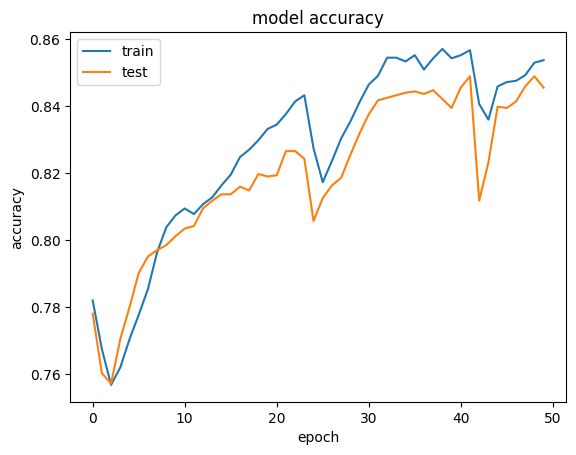

In [41]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

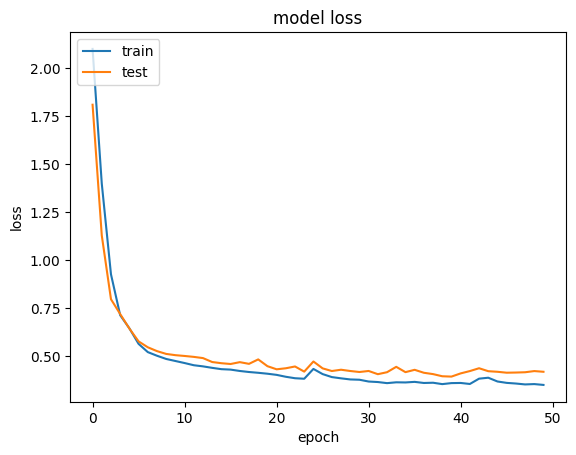

In [42]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 860us/step


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   62],
       [ 225,  180]], dtype=int64)

In [45]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [46]:
print(score)

0.8565
